<h1 style="color: rgb(0, 80, 120);font-size: 2rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">TP1: LinearRegression</h1>

In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h1 style="color: rgb(0, 80, 120);font-size: 2rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Exercice 1 : Régression linéaire avec une seule variable</h1>

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Retrieving data in the form of the dataFrame</h1>

In [2]:
data = pd.read_csv('ex1data1.txt')

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Renaming features</h1>

In [3]:
data.rename(columns = {'6.1101':'Population','17.592':'Profit'}, inplace = True)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">First 5 rows of the dataFrame</h1>

In [4]:
data.head()

,Population,Profit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting data</h1>

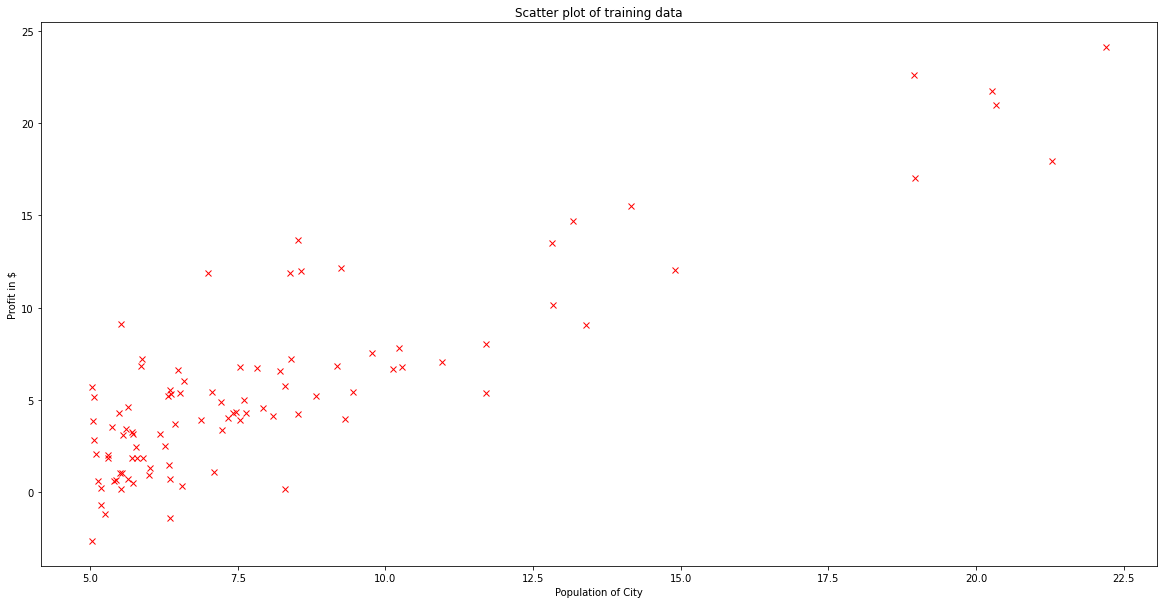

In [5]:
fig = plt.figure(figsize = (20,10))
X_train = data["Population"]        
Y_train = data["Profit"]       
plt.plot(X_train, Y_train, 'rx') 
plt.xlabel("Population of City")
plt.ylabel("Profit in $")
plt.title("Scatter plot of training data")
plt.show() 

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Cost function</h1>

In [6]:
def cost_function(X, Y, w, b):
    m = X.shape[0]
    cost = np.sum(((w * X + b) - Y) ** 2) / (2 * m)
    return cost

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Derivative function</h1>

In [7]:
def Derivative(X, Y, w, b): 
    m = X.shape[0]
    dw = np.sum(((w * X + b) - Y) * X)
    db = np.sum(((w * X + b) - Y))
    return dw / m, db / m

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Gradient descent function</h1>

In [8]:
def gradient_descent(X, Y):
    learning_rate = 0.01
    iterations = 1000
    w_temp, b_temp = 0, 0
    for i in range(iterations):
        w = w_temp - learning_rate * Derivative(X, Y, w_temp, b_temp)[0]
        b = b_temp - learning_rate * Derivative(X, Y, w_temp, b_temp)[1]
        w_temp = w
        b_temp = b
    return w_temp, b_temp

In [9]:
w, b = gradient_descent(X_train, Y_train)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Optimal parameters</h1>

In [10]:
print("Les deux paramètres optimales sont w =",w,", b =",b) 

Les deux paramètres optimales sont w = 1.1430560913097336 , b = -3.507704661176449


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Cost function using the optimal parameters</h1>

In [11]:
print("Cost function is: ", cost_function(X_train, Y_train, w, b))

Cost function is:  3.5047572070621515


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Prediction function</h1>

In [12]:
def predict(X, w, b):
    pred = (w * X + b)
    return pred

In [13]:
pred = predict(X_train, w, b)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting predictions</h1>

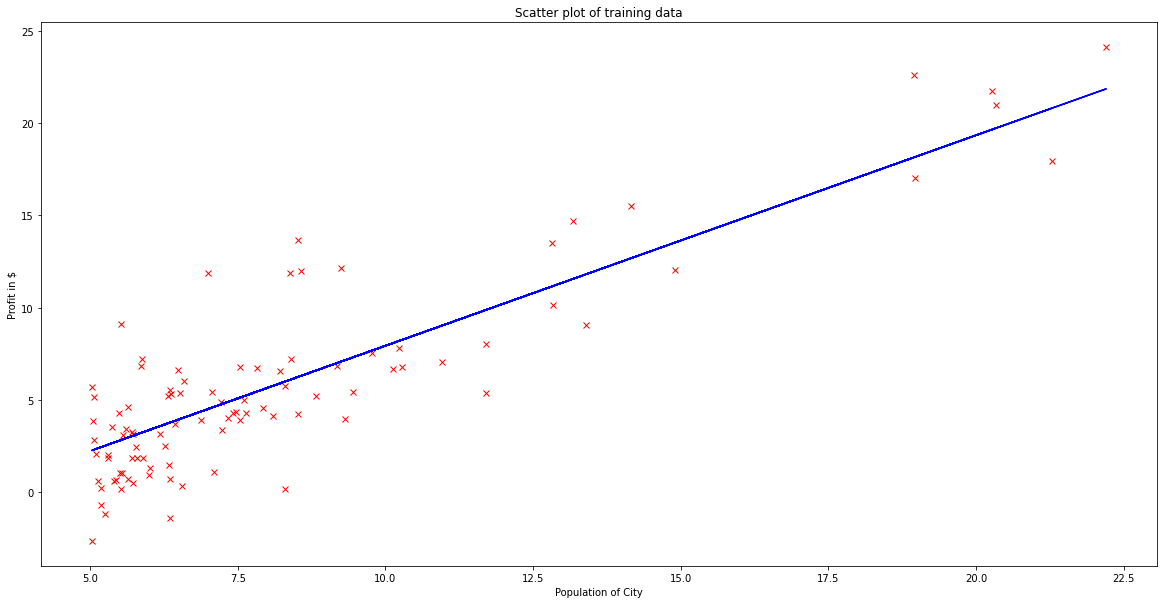

In [14]:
fig = plt.figure(figsize = (20,10))
X_train = data["Population"]        
Y_train = data["Profit"] 
plt.plot(X_train, Y_train, 'rx', label = 'Training data') 
plt.plot(X_train, pred, 'b', label = 'Linear regression')
plt.xlabel("Population of City")
plt.ylabel("Profit in $")
plt.title("Scatter plot of training data")
plt.show() 

<h1 style="color: rgb(0, 80, 120);font-size: 2rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Exercice 2 : Régression linéaire avec plusieurs variables</h1>

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Retrieving data in the form of the dataFrame</h1>

In [15]:
df = pd.read_csv('ex1data2.txt')

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Renaming features</h1>

In [16]:
df.rename(columns = {'2104':'Taille des maisons','3':'Nombre de chambres','399900':'Prix' }, inplace = True)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">First 5 rows of the dataFrame</h1>

In [17]:
df.head()

,Taille des maisons,Nombre de chambres,Prix
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Mean subtraction and standard deviation</h1>

In [18]:
df["Taille des maisons"] = (df["Taille des maisons"]  - np.mean(df["Taille des maisons"])) / np.std(df["Taille des maisons"])
df["Nombre de chambres"] = (df["Nombre de chambres"] - np.mean(df["Nombre de chambres"])) / np.std(df["Nombre de chambres"])
df["Prix"] = (df["Prix"] - np.mean(df["Prix"])) / np.std(df["Prix"])

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">First 5 rows of the dataFrame</h1>

In [19]:
df.head()

,Taille des maisons,Nombre de chambres,Prix
0,-0.501458,-0.228665,-0.073918
1,0.505398,-0.228665,0.239571
2,-0.733034,-1.543487,-0.858844
3,1.260539,1.086158,1.609783
4,-0.016909,1.086158,-0.314447


In [20]:
X_train = df.drop("Prix",axis=1).to_numpy()
Y_train = df["Prix"].to_numpy()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting data</h1>

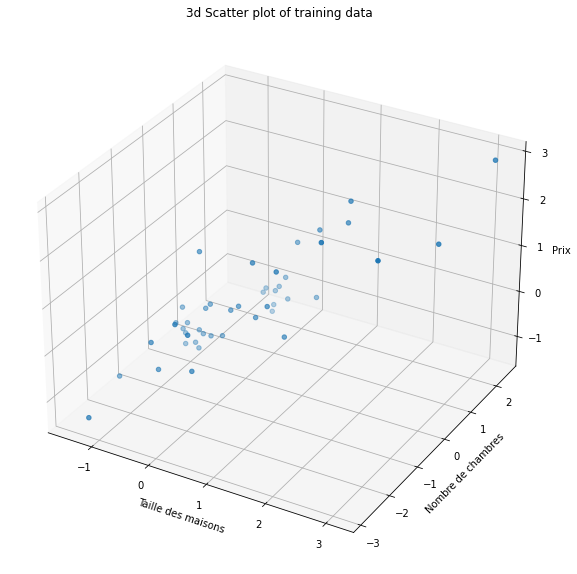

In [21]:
fig = plt.figure(figsize = (20,10))      
ax = plt.axes(projection ='3d')
 
ax.scatter(X_train[:,0], X_train[:,1], Y_train)

ax.set_xlabel("Taille des maisons")
ax.set_ylabel("Nombre de chambres")
ax.set_zlabel('Prix')

ax.set_title('3d Scatter plot of training data')
plt.show()

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Cost function</h1>

In [22]:
def cost_function(X, Y, W, b):
    m = X.shape[0]
    cost = np.sum(((np.dot(X,W) + b) - Y) ** 2) / (2 * m)
    return cost

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Derivative function</h1>

In [23]:
def Derivative(X, Y, W, b):
    nbl, nbc = X.shape
    dw = np.zeros((nbc))
    f_wb = (np.dot(X,W) + b - Y)
    db = np.sum(f_wb) / nbl
    for i in range(nbc):
        for j in range(nbl):
            dw[i] += f_wb[j] * X[j][i]
    dw = dw / nbl
    return dw, db

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Gradient descent function</h1>

In [24]:
def gradient_descent(X, Y):
    learning_rate = 0.01
    iterations = 1000
    W_temp, b_temp = np.array([0,0]), 0
    for i in range(iterations):
        w = W_temp - learning_rate * Derivative(X, Y, W_temp, b_temp)[0]
        b = b_temp - learning_rate * Derivative(X, Y, W_temp, b_temp)[1]
        W_temp = w
        b_temp = b
    return W_temp, b_temp

In [25]:
W, b = gradient_descent(X_train, Y_train)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Optimal parameters</h1>

In [26]:
print("Les deux paramètres optimales sont W =",W,", b =",b) 

Les deux paramètres optimales sont W = [ 0.87819828 -0.04418333] , b = 7.323851670054433e-17


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Cost function using the optimal parameters</h1>

In [27]:
print("Cost function is: ", cost_function(X_train, Y_train, W, b))

Cost function is:  0.13285405470883105


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Prediction function</h1>

In [28]:
def predict(X, W, b):
    pred = np.dot(X,W) + b
    return pred

In [29]:
pred = predict(X_train, W, b)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Plotting predictions</h1>

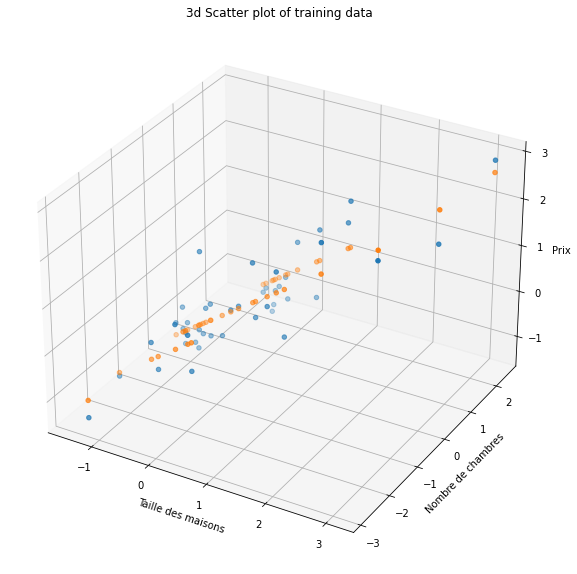

In [30]:
fig = plt.figure(figsize = (20,10))      
ax = plt.axes(projection ='3d')

ax.scatter(X_train[:,0], X_train[:,1], Y_train)
ax.scatter(X_train[:,0], X_train[:,1], pred, 'r')

ax.set_xlabel("Taille des maisons")
ax.set_ylabel("Nombre de chambres")
ax.set_zlabel('Prix')

ax.set_title('3d Scatter plot of training data')
plt.show()